In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans

In [20]:
data = pd.read_csv('Clean_Data')

In [21]:
data.head(5)

,srcOct1,srcOct2,srcOct3,srcOct4,destOct1,destOct2,destOct3,destOct4,srcPort,destPort,...,packetSizes_1,packetSizes_2,packetSizes_3,packetSizes_4,packetSizes_5,tpkt1,tpkt2,tpkt3,tpkt4,tpkt5
0,128,244,74,6,133,138,101,30,32767,8545,...,54,54,54,54,54,0.000045,0.000735,0.000746,0.001274,0.001321
1,185,18,10,87,133,138,207,238,51327,9988,...,54,62,54,54,54,0.000311,0.000801,0.001037,0.001104,0.001200
2,59,56,111,107,133,138,213,194,8403,31691,...,62,54,66,54,54,0.000072,0.000702,0.000805,0.000963,0.001240
3,51,96,38,226,133,138,1,49,53937,42979,...,54,58,54,62,74,0.000123,0.000547,0.000625,0.000733,0.000983
4,220,11,241,81,133,138,46,58,30050,4093,...,62,54,54,54,54,0.000530,0.001073,0.001132,0.001136,0.001371


In [22]:
ks = []
ds = []
from sklearn.metrics import davies_bouldin_score
for k in range(2,15):
    kmeans = KMeans(n_clusters = k,random_state = 1).fit(data)
    labels = kmeans.labels_
    d=davies_bouldin_score(data,labels)
    ks.append(k)
    ds.append(d)

C:\Users\perera\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\perera\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\perera\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\perera\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
C:\Users\perera\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_

In [23]:
dfs = pd.DataFrame({'k':ks,'davies_bouldin_score':ds})
dfs

,k,davies_bouldin_score
0,2,0.779554
1,3,0.623213
2,4,0.515704
3,5,0.631064
4,6,0.715259
5,7,0.672837
6,8,0.686767
7,9,0.711770
8,10,0.687076
9,11,0.700048


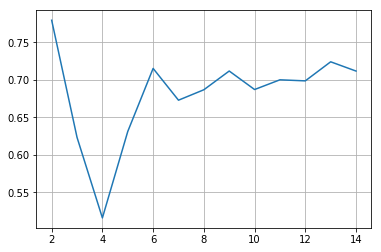

In [24]:
import matplotlib.pyplot as plt
plt.plot(ks,ds)
plt.grid()
plt.show()

In [25]:
model = KMeans(n_clusters = 4).fit(data)
label1 = model.labels_
label1

array([0, 0, 1, ..., 2, 0, 0])

In [26]:
count = np.bincount(label1[label1>=0])
count

array([50575, 13334, 48076, 14343], dtype=int64)

In [27]:
data['labels']=label1

In [28]:
data.head(5)

,srcOct1,srcOct2,srcOct3,srcOct4,destOct1,destOct2,destOct3,destOct4,srcPort,destPort,...,packetSizes_2,packetSizes_3,packetSizes_4,packetSizes_5,tpkt1,tpkt2,tpkt3,tpkt4,tpkt5,labels
0,128,244,74,6,133,138,101,30,32767,8545,...,54,54,54,54,0.000045,0.000735,0.000746,0.001274,0.001321,0
1,185,18,10,87,133,138,207,238,51327,9988,...,62,54,54,54,0.000311,0.000801,0.001037,0.001104,0.001200,0
2,59,56,111,107,133,138,213,194,8403,31691,...,54,66,54,54,0.000072,0.000702,0.000805,0.000963,0.001240,1
3,51,96,38,226,133,138,1,49,53937,42979,...,58,54,62,74,0.000123,0.000547,0.000625,0.000733,0.000983,2
4,220,11,241,81,133,138,46,58,30050,4093,...,54,54,54,54,0.000530,0.001073,0.001132,0.001136,0.001371,0


In [29]:
data.to_csv('cluster_data',index=False)